In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns 


In [153]:
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)

In [154]:
X

array([[-0.66192342, -1.1736513 ],
       [-1.64064134, -1.55815873],
       [ 1.64443019, -0.93881765],
       ...,
       [ 1.64860518, -1.05323513],
       [ 1.12381821,  0.19650965],
       [-1.28378405, -1.92583906]])

In [155]:
y

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,

In [156]:
pd.DataFrame(X)[0]

0     -0.661923
1     -1.640641
2      1.644430
3     -0.301959
4     -2.330482
         ...   
995    0.974431
996    1.256757
997    1.648605
998    1.123818
999   -1.283784
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

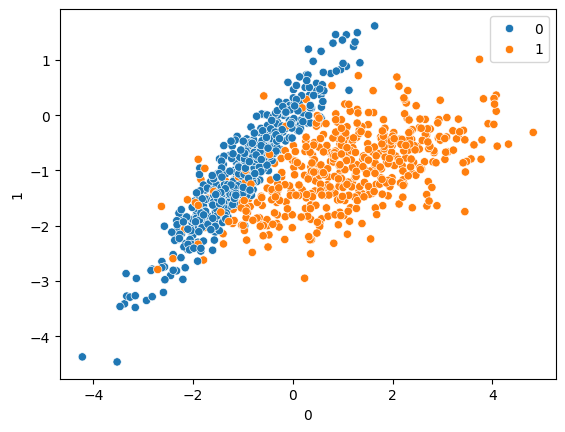

In [157]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [159]:
from sklearn.svm import SVC
classifire = SVC(kernel='linear')
classifire.fit(X_train,y_train)


SVC(kernel='linear')

In [160]:
y_pred = classifire.predict(X_test)

In [161]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [162]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       134
           1       0.99      0.91      0.95       116

    accuracy                           0.96       250
   macro avg       0.96      0.95      0.96       250
weighted avg       0.96      0.96      0.96       250



In [163]:
accuracy_score(y_test,y_pred)

0.956

In [164]:
confusion_matrix(y_test,y_pred)

array([[133,   1],
       [ 10, 106]])

# HyperParameter Tunning

In [165]:
# defining parameter range
parameter = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001]
}
from sklearn.model_selection import GridSearchCV

In [166]:
grid = GridSearchCV(SVC(),param_grid=parameter,cv=5,refit=True,verbose=3)

In [167]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.947 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.933 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.933 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.933 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.900 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.920 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.913 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.933 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.913 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.867 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.867 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [168]:
y_pred= grid.predict(X_test)

In [169]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       134
           1       0.99      0.91      0.95       116

    accuracy                           0.96       250
   macro avg       0.96      0.95      0.96       250
weighted avg       0.96      0.96      0.96       250



In [170]:
accuracy_score(y_test,y_pred)

0.956

In [171]:
confusion_matrix(y_test,y_pred)

array([[133,   1],
       [ 10, 106]])